<a href="https://colab.research.google.com/github/Harla/TimeSeries/blob/master/LiveData_OutputACPower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/live_data.csv')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
0,0,1.557362e+09,41611464.0,2019-05-09 00:39:07,103.0,kripya.d180121,2.0,35.693696,NaN,0.0,93.362885,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
1,1,1.557362e+09,41611496.0,2019-05-09 00:39:41,103.0,kripya.d180121,2.0,35.886784,NaN,0.0,93.362885,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2,2,1.557362e+09,41611523.0,2019-05-09 00:40:17,103.0,kripya.d180121,2.0,35.886784,NaN,0.0,93.362885,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
3,3,1.557362e+09,41611552.0,2019-05-09 00:40:52,103.0,kripya.d180121,2.0,36.300544,NaN,0.0,93.362885,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
4,4,1.557362e+09,41611581.0,2019-05-09 00:41:26,103.0,kripya.d180121,2.0,36.493632,NaN,0.0,93.362885,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER


# Working with live data

# Time Series Analysis AR Model

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import seaborn as sns

In [6]:
df.head(2)

,Unnamed: 0,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
0,0,1.557362e+09,41611464.0,2019-05-09 00:39:07,103.0,kripya.d180121,2.0,35.693696,NaN,0.0,93.362885,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
1,1,1.557362e+09,41611496.0,2019-05-09 00:39:41,103.0,kripya.d180121,2.0,35.886784,NaN,0.0,93.362885,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER


In [0]:
df1 = df.drop(['Unnamed: 0'],axis = 1)

In [12]:
df1.isnull().sum()

timestamp                   31
dataId                      31
updatedDT                   31
SystemID                    31
UID                         31
DeviceCount                 31
InputPVVoltage              31
InputPVCurrent           89325
InputPVPower                31
InputPVEnergyTotal          31
OutputACVoltage             31
OutputACCurrent          89325
OutputACPower               31
OutputACEnergyTotal         31
OutputACEnergyOnGrid        31
OutputACEnergyOffGrid       31
Temperature                 31
SystemStatus                31
TripError                   31
MasterSlave                 31
dtype: int64

In [0]:
df2 = df1[df1['timestamp'].isnull()]

In [14]:
df2

,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
1120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
483764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
484927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
486090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df3 = pd.concat([df1,df2]).drop_duplicates(keep = False)
df3.isnull().sum()

timestamp                    0
dataId                       0
updatedDT                    0
SystemID                     0
UID                          0
DeviceCount                  0
InputPVVoltage               0
InputPVCurrent           89004
InputPVPower                 0
InputPVEnergyTotal           0
OutputACVoltage              0
OutputACCurrent          89004
OutputACPower                0
OutputACEnergyTotal          0
OutputACEnergyOnGrid         0
OutputACEnergyOffGrid        0
Temperature                  0
SystemStatus                 0
TripError                    0
MasterSlave                  0
dtype: int64

In [17]:
df3.shape[0] #No. of rows

511716

In [18]:
df3.dtypes

timestamp                float64
dataId                   float64
updatedDT                 object
SystemID                 float64
UID                       object
DeviceCount              float64
InputPVVoltage           float64
InputPVCurrent           float64
InputPVPower             float64
InputPVEnergyTotal       float64
OutputACVoltage          float64
OutputACCurrent          float64
OutputACPower            float64
OutputACEnergyTotal      float64
OutputACEnergyOnGrid     float64
OutputACEnergyOffGrid    float64
Temperature              float64
SystemStatus              object
TripError                 object
MasterSlave               object
dtype: object

In [19]:
df3['updatedDT'] = pd.to_datetime(df3['updatedDT'])
df3['updatedDT'] = df3['updatedDT'].dt.tz_localize("GMT").dt.tz_convert('Asia/Calcutta')
df3

,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
0,1.557362e+09,41611464.0,2019-05-09 06:09:07+05:30,103.0,kripya.d180121,2.0,35.693696,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
1,1.557362e+09,41611496.0,2019-05-09 06:09:41+05:30,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2,1.557362e+09,41611523.0,2019-05-09 06:10:17+05:30,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
3,1.557362e+09,41611552.0,2019-05-09 06:10:52+05:30,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
4,1.557362e+09,41611581.0,2019-05-09 06:11:26+05:30,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
5,1.557363e+09,41611613.0,2019-05-09 06:12:01+05:30,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,93.362885,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
6,1.557363e+09,41611641.0,2019-05-09 06:12:36+05:30,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,93.362885,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
7,1.557363e+09,41611672.0,2019-05-09 06:13:11+05:30,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,93.362885,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
8,1.557363e+09,41611702.0,2019-05-09 06:13:46+05:30,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,93.362885,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER
9,1.557363e+09,41611731.0,2019-05-09 06:14:21+05:30,103.0,kripya.d180121,2.0,36.121248,0.000000,0.000000,93.362885,235.7709,0.0065,1.532511,124.061983,123.810505,0.251477,48.384,GRID_MODE,NO_FAULT,MASTER


# Changing updatedDT from object to datetime datatype
#Localizing the time zone and converting time zone to local time i.e. Asia/Calcutta

In [21]:
df4 = df3.set_index('updatedDT')
df4.head()

,timestamp,dataId,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
updatedDT,,,,,,,,,,,,,,,,,,,
2019-05-09 06:09:07+05:30,1.557362e+09,41611464.0,103.0,kripya.d180121,2.0,35.693696,NaN,0.0,93.362885,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 06:09:41+05:30,1.557362e+09,41611496.0,103.0,kripya.d180121,2.0,35.886784,NaN,0.0,93.362885,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 06:10:17+05:30,1.557362e+09,41611523.0,103.0,kripya.d180121,2.0,35.886784,NaN,0.0,93.362885,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 06:10:52+05:30,1.557362e+09,41611552.0,103.0,kripya.d180121,2.0,36.300544,NaN,0.0,93.362885,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 06:11:26+05:30,1.557362e+09,41611581.0,103.0,kripya.d180121,2.0,36.493632,NaN,0.0,93.362885,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER


#To set as index

In [22]:
df4['UID'].value_counts()

kripya.d180101    63928
kripya.d180103    63928
kripya.d180105    63925
kripya.d180104    62892
kripya.d180121    51660
kripya.d180123    45939
180123            32768
180121            32768
kripya.d180142    24964
kripya.d180141    19480
kripya.d180143    19456
180123            15574
180121            14434
Name: UID, dtype: int64

In [23]:
df4.UID

updatedDT
2019-05-09 06:09:07+05:30    kripya.d180121
2019-05-09 06:09:41+05:30    kripya.d180121
2019-05-09 06:10:17+05:30    kripya.d180121
2019-05-09 06:10:52+05:30    kripya.d180121
2019-05-09 06:11:26+05:30    kripya.d180121
2019-05-09 06:12:01+05:30    kripya.d180121
2019-05-09 06:12:36+05:30    kripya.d180121
2019-05-09 06:13:11+05:30    kripya.d180121
2019-05-09 06:13:46+05:30    kripya.d180121
2019-05-09 06:14:21+05:30    kripya.d180121
2019-05-09 06:14:57+05:30    kripya.d180121
2019-05-09 06:15:32+05:30    kripya.d180121
2019-05-09 06:16:07+05:30    kripya.d180121
2019-05-09 06:16:41+05:30    kripya.d180121
2019-05-09 06:17:17+05:30    kripya.d180121
2019-05-09 06:17:52+05:30    kripya.d180121
2019-05-09 06:18:27+05:30    kripya.d180121
2019-05-09 06:19:02+05:30    kripya.d180121
2019-05-09 06:19:37+05:30    kripya.d180121
2019-05-09 06:20:12+05:30    kripya.d180121
2019-05-09 06:20:48+05:30    kripya.d180121
2019-05-09 06:21:23+05:30    kripya.d180121
2019-05-09 06:21:58+05

In [0]:
df5 = df4[(df4.UID == 'kripya.d180105')]

In [42]:
df5.UID.value_counts()

kripya.d180105    63925
Name: UID, dtype: int64

In [43]:
df5

,timestamp,dataId,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
updatedDT,,,,,,,,,,,,,,,,,,,
2019-05-09 16:31:04+05:30,1.557400e+09,41646623.0,120.0,kripya.d180105,4.0,29.045952,0.796821,23.144416,10.169249,251.3229,0.0709,17.818794,12.158896,12.157944,0.000952,56.928,GRID_MODE,NO_FAULT,MASTER
2019-05-09 16:31:41+05:30,1.557400e+09,41646662.0,120.0,kripya.d180105,4.0,27.556416,0.953114,26.264419,10.169519,250.6029,0.0909,22.779804,12.159130,12.158178,0.000952,57.984,GRID_MODE,NO_FAULT,MASTER
2019-05-09 16:32:19+05:30,1.557400e+09,41646703.0,120.0,kripya.d180105,4.0,28.246016,0.967941,27.340469,10.169808,251.5149,0.0937,23.566946,12.159379,12.158427,0.000952,57.648,GRID_MODE,NO_FAULT,MASTER
2019-05-09 16:32:58+05:30,1.557400e+09,41646745.0,120.0,kripya.d180105,4.0,28.577024,0.937350,26.786684,10.170098,251.3229,0.0909,22.845252,12.159626,12.158674,0.000952,57.744,GRID_MODE,NO_FAULT,MASTER
2019-05-09 16:33:36+05:30,1.557400e+09,41646787.0,120.0,kripya.d180105,4.0,28.259808,1.009585,28.530668,10.170399,251.7549,0.0993,24.999262,12.159890,12.158938,0.000952,57.936,GRID_MODE,NO_FAULT,MASTER
2019-05-09 16:34:13+05:30,1.557400e+09,41646825.0,120.0,kripya.d180105,4.0,26.659936,1.152405,30.723036,10.170715,251.5149,0.1137,28.597244,12.160184,12.159232,0.000952,58.128,GRID_MODE,NO_FAULT,MASTER
2019-05-09 16:34:50+05:30,1.557400e+09,41646864.0,120.0,kripya.d180105,4.0,27.046112,1.058528,28.629067,10.171009,251.6589,0.1017,25.593710,12.160447,12.159495,0.000952,58.368,GRID_MODE,NO_FAULT,MASTER
2019-05-09 16:35:27+05:30,1.557400e+09,41646903.0,120.0,kripya.d180105,4.0,27.046112,1.058528,28.629067,10.171303,251.6589,0.1017,25.593710,12.160710,12.159758,0.000952,58.368,GRID_MODE,NO_FAULT,MASTER
2019-05-09 16:36:04+05:30,1.557400e+09,41646939.0,120.0,kripya.d180105,4.0,27.046112,1.058528,28.629067,10.171597,251.6589,0.1017,25.593710,12.160973,12.160021,0.000952,58.368,GRID_MODE,NO_FAULT,MASTER


In [44]:
print(df5.shape[0])
print(df5.shape[1])

63925
19


In [45]:
df5.isnull().sum()

timestamp                    0
dataId                       0
SystemID                     0
UID                          0
DeviceCount                  0
InputPVVoltage               0
InputPVCurrent           26006
InputPVPower                 0
InputPVEnergyTotal           0
OutputACVoltage              0
OutputACCurrent          26006
OutputACPower                0
OutputACEnergyTotal          0
OutputACEnergyOnGrid         0
OutputACEnergyOffGrid        0
Temperature                  0
SystemStatus                 0
TripError                    0
MasterSlave                  0
dtype: int64

In [0]:
ts = df5['OutputACPower']

In [47]:
ts.head()

updatedDT
2019-05-09 16:31:04+05:30    17.818794
2019-05-09 16:31:41+05:30    22.779804
2019-05-09 16:32:19+05:30    23.566946
2019-05-09 16:32:58+05:30    22.845252
2019-05-09 16:33:36+05:30    24.999262
Name: OutputACPower, dtype: float64

In [0]:
ts=ts.reset_index()

In [35]:
ts

,updatedDT,OutputACPower
0,2019-05-09 16:31:04+05:30,20.264749
1,2019-05-09 16:31:41+05:30,21.957461
2,2019-05-09 16:32:19+05:30,21.822119
3,2019-05-09 16:32:58+05:30,25.753403
4,2019-05-09 16:33:36+05:30,24.870255
5,2019-05-09 16:34:13+05:30,26.466740
6,2019-05-09 16:34:50+05:30,23.586718
7,2019-05-09 16:35:27+05:30,23.292593
8,2019-05-09 16:36:04+05:30,24.290254
9,2019-05-09 16:36:46+05:30,27.662380


In [0]:
ts = ts.set_index('updatedDT')

In [50]:
ts

,OutputACPower
updatedDT,
2019-05-09 16:31:04+05:30,17.818794
2019-05-09 16:31:41+05:30,22.779804
2019-05-09 16:32:19+05:30,23.566946
2019-05-09 16:32:58+05:30,22.845252
2019-05-09 16:33:36+05:30,24.999262
2019-05-09 16:34:13+05:30,28.597244
2019-05-09 16:34:50+05:30,25.593710
2019-05-09 16:35:27+05:30,25.593710
2019-05-09 16:36:04+05:30,25.593710


In [51]:
ts.isnull().sum()

OutputACPower    0
dtype: int64

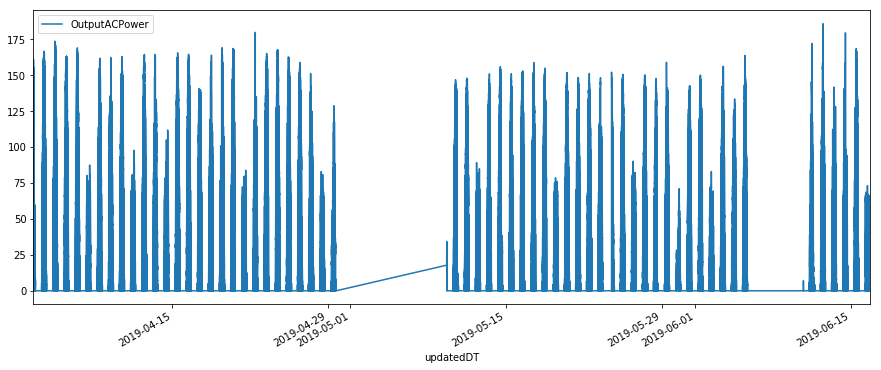

In [52]:
ts.plot()

In [60]:
#ADF Test for stationarity check
from statsmodels.tsa.stattools import adfuller
X = ts.OutputACPower
r = adfuller(X)
print('ADF Statistics : %f' %(r[0]))
print('p-value : %f' %(r[1]))
print('Critical Values : ')
for key,value in r[4].items():
    print('\t%s,%f' %(key,value))

ADF Statistics : -14.925897
p-value : 0.000000
Critical Values : 
	1%,-3.430452
	5%,-2.861585
	10%,-2.566794


In [59]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    
#apply kpss test on the series
kpss_test(ts.OutputACPower)

Results of KPSS Test:
Test Statistic            0.819864
p-value                   0.010000
Lags Used                61.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [58]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(ts.OutputACPower)

Results of Dickey-Fuller Test:
Test Statistic                -1.492590e+01
p-value                        1.389288e-27
#Lags Used                     4.600000e+01
Number of Observations Used    6.387800e+04
Critical Value (1%)           -3.430452e+00
Critical Value (5%)           -2.861585e+00
Critical Value (10%)          -2.566794e+00
dtype: float64


In [77]:
#Check for Stationarity
#Mean and Variance are similar for the first and second half of the data
X=ts.OutputACPower
split= int(len(X)/4)
#print(split)
X1,X2,X3,X4 = X[0:split],X[split:2*split],X[2*split:3*split],X[3*split:]
#X1,X2=X[0:3000],X[3000:7074]
mean1,mean2,mean3,mean4=X1.mean(),X2.mean(),X3.mean(),X4.mean()
var1,var2,var3,var4 = X1.var(),X2.var(),X3.var(),X4.var()
print('mean1 is : %f , mean2 is : %f , mean3 is : %f , mean4 is : %f' %(mean1,mean2,mean3,mean4))
print('Variance1 is : %f , Variance2 is : %f , Variance3 is : %f , Variance4 is : %f' %(var1,var2,var3,var4))

mean1 is : 42.418681 , mean2 is : 35.522972 , mean3 is : 36.992256 , mean4 is : 33.302979
Variance1 is : 2877.788175 , Variance2 is : 2519.303656 , Variance3 is : 2283.030511 , Variance4 is : 1845.061704


In [115]:
ts.OutputACPower.value_counts()

0.000000      28201
3.784047          8
124.342830        7
10.084750         6
3.261261          5
23.722470         5
4.004567          5
33.424562         5
12.552774         5
4.040889          5
3.242685          5
137.330262        5
7.687308          5
4.394891          5
152.602011        5
4.462009          5
30.685304         4
14.716430         4
12.644183         4
148.207764        4
40.504571         4
106.846801        4
154.963844        4
36.970736         4
148.366941        4
18.226348         4
54.709874         4
3.660886          4
13.702330         4
4.169004          4
              ...  
148.697449        1
5.346021          1
51.338699         1
139.239754        1
138.094298        1
151.135609        1
19.105083         1
128.324844        1
143.777573        1
42.652048         1
46.973725         1
143.643531        1
35.957153         1
162.448873        1
3.780471          1
97.277614         1
40.132540         1
9.420481          1
48.489447         1


# Case 4: KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary

# Using differencing to make the series stationary

In [0]:
ts_diff=ts-ts.shift(1)

## In this method, we compute the difference of consecutive terms in the series. Differencing is typically performed to get rid of the varying mean. Mathematically, differencing can be written as:

# yt‘ = yt – y(t-1)

In [62]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    
#apply kpss test on the series
kpss_test(ts_diff.OutputACPower)

Results of KPSS Test:
Test Statistic              NaN
p-value                     NaN
Lags Used                61.000
Critical Value (10%)      0.347
Critical Value (5%)       0.463
Critical Value (2.5%)     0.574
Critical Value (1%)       0.739
dtype: float64


In [63]:
ts_diff.isnull().sum()

OutputACPower    1
dtype: int64

In [0]:
ts_diff = ts_diff.dropna()

In [65]:
ts_diff.isnull().sum()

OutputACPower    0
dtype: int64

In [66]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    
#apply kpss test on the series
kpss_test(ts_diff.OutputACPower)

Results of KPSS Test:
Test Statistic            0.001053
p-value                   0.100000
Lags Used                61.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [67]:
#ADF Test for stationarity check
from statsmodels.tsa.stattools import adfuller
X = ts_diff.OutputACPower
r = adfuller(X)
print('ADF Statistics : %f' %(r[0]))
print('p-value : %f' %(r[1]))
print('Critical Values : ')
for key,value in r[4].items():
    print('\t%s,%f' %(key,value))

ADF Statistics : -49.980599
p-value : 0.000000
Critical Values : 
	1%,-3.430452
	5%,-2.861585
	10%,-2.566794


In [78]:
#Check for Stationarity
#Mean and Variance are similar for the first and second half of the data
X=ts_diff.OutputACPower
split= int(len(X)/2)
#print(split)
X1,X2 = X[0:split],X[split:]
#X1,X2=X[0:3000],X[3000:7074]
mean1,mean2=X1.mean(),X2.mean()
var1,var2 = X1.var(),X2.var()
print('mean1 is : %f , mean2 is : %f ' %(mean1,mean2))
print('Variance1 is : %f , Variance2 is : %f ' %(var1,var2))

mean1 is : -0.000557 , mean2 is : -0.000000 
Variance1 is : 1351.153989 , Variance2 is : 990.732343 


In [79]:
#Check for Stationarity
#Mean and Variance are similar for the first and second half of the data
X=ts_diff.OutputACPower
split= int(len(X)/4)
#print(split)
X1,X2,X3,X4 = X[0:split],X[split:2*split],X[2*split:3*split],X[3*split:]
#X1,X2=X[0:3000],X[3000:7074]
mean1,mean2,mean3,mean4=X1.mean(),X2.mean(),X3.mean(),X4.mean()
var1,var2,var3,var4 = X1.var(),X2.var(),X3.var(),X4.var()
print('mean1 is : %f , mean2 is : %f , mean3 is : %f , mean4 is : %f' %(mean1,mean2,mean3,mean4))
print('Variance1 is : %f , Variance2 is : %f , Variance3 is : %f , Variance4 is : %f' %(var1,var2,var3,var4))

mean1 is : -0.001115 , mean2 is : 0.000000 , mean3 is : 0.007237 , mean4 is : -0.007237
Variance1 is : 1224.617906 , Variance2 is : 1477.774625 , Variance3 is : 1049.416683 , Variance4 is : 932.109896


In [71]:
ts_diff.shape

(63924, 1)

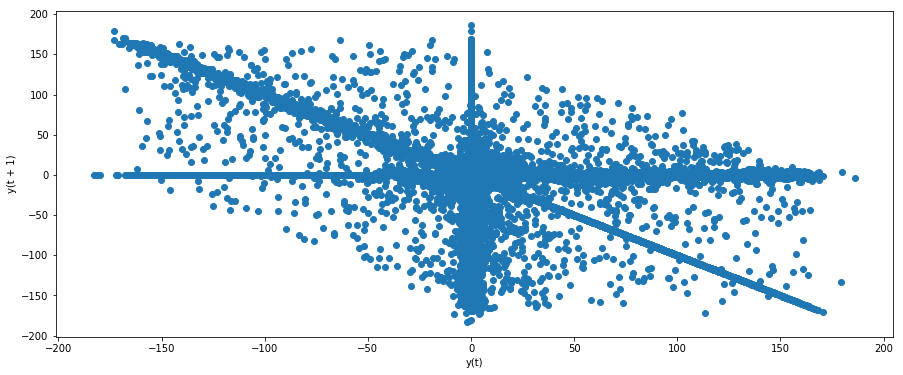

In [72]:
from pandas.plotting import lag_plot
lag_plot(ts_diff)

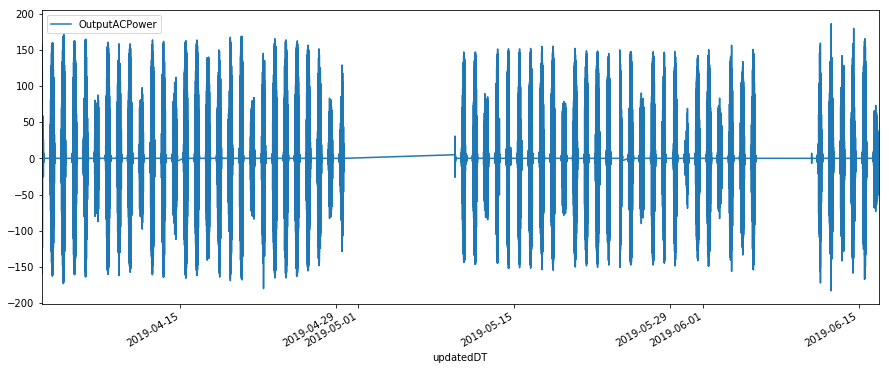

In [73]:
ts_diff.plot()

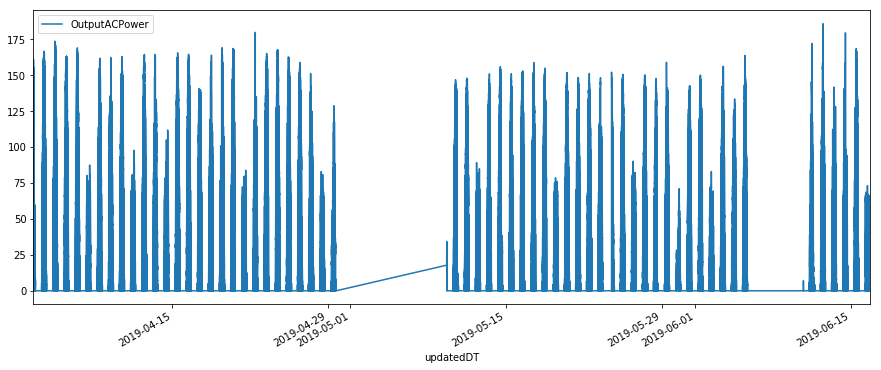

In [74]:
ts.plot()

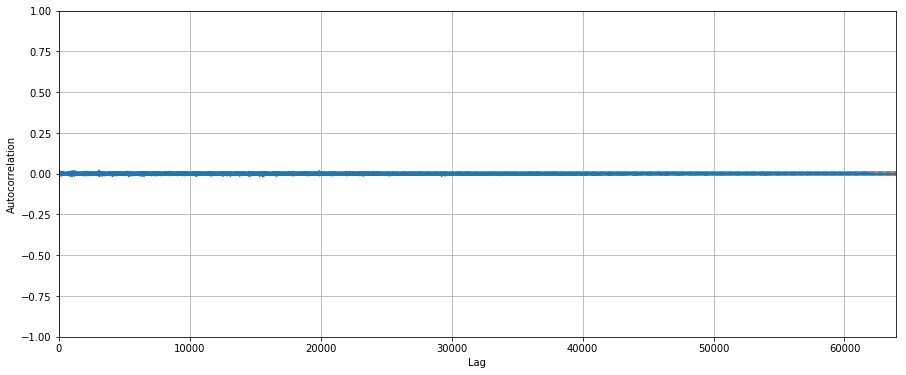

In [76]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ts_diff)

In [0]:
ts1 = ts.resample('H').sum()

In [111]:
ts1

,OutputACPower
updatedDT,
2019-04-02 13:00:00+05:30,12420.403651
2019-04-02 14:00:00+05:30,3355.217645
2019-04-02 15:00:00+05:30,51.172770
2019-04-02 16:00:00+05:30,3094.586181
2019-04-02 17:00:00+05:30,670.508614
2019-04-02 18:00:00+05:30,0.000000
2019-04-02 19:00:00+05:30,0.000000
2019-04-02 20:00:00+05:30,0.000000
2019-04-02 21:00:00+05:30,0.000000


# series converted to hourly using resample function

In [113]:
ts1.OutputACPower.value_counts()

0.000000        1086
3961.586932        1
8230.526081        1
1026.589419        1
170.528196         1
70.507431          1
9795.664828        1
227.123388         1
4544.680997        1
3355.347297        1
3999.454883        1
377.323964         1
24.816438          1
3909.142740        1
2943.973415        1
3444.129291        1
6745.960602        1
2294.829155        1
6605.687654        1
1755.883013        1
2292.068061        1
7657.349190        1
14299.520996       1
5718.254276        1
2369.853797        1
1101.699491        1
3148.851954        1
4.405184           1
2641.028913        1
6090.003234        1
                ... 
45.908509          1
5396.120925        1
3624.069128        1
8715.829240        1
780.965655         1
481.415587         1
232.085754         1
2861.621520        1
4.706457           1
178.608193         1
90.528552          1
5109.274437        1
3809.369038        1
236.295788         1
14.477000          1
2936.951288        1
1388.835233  

In [134]:
#ts2 = ts1.drop(ts1['OutputACPower']!=0,axis=0)
#ts2
ts2=ts1[ts1['OutputACPower']!=0]
ts2.OutputACPower.value_counts()
#ts2 contains hourly data with has only non zero power

3675.509984     1
674.102162      1
4091.790744     1
5156.131582     1
1631.116159     1
5.177703        1
4637.251082     1
2808.472224     1
4544.680997     1
6311.623573     1
1232.667146     1
4142.195063     1
436.106400      1
91.232550       1
12627.189855    1
45.908509       1
5396.120925     1
3624.069128     1
7964.256968     1
42.814003       1
507.599378      1
8229.172507     1
2565.337336     1
1098.488134     1
3806.318364     1
1477.066232     1
2807.536437     1
1357.033646     1
7019.552141     1
354.040377      1
               ..
529.317450      1
3909.142740     1
238.370358      1
2943.973415     1
8454.350802     1
3444.129291     1
6745.960602     1
3174.592945     1
3355.347297     1
2014.745041     1
1026.589419     1
12420.403651    1
2282.148911     1
1953.607648     1
7657.349190     1
646.554756      1
10445.732981    1
8230.526081     1
1724.629883     1
170.528196      1
227.123388      1
12.659276       1
70.507431       1
103.962908      1
3826.32569

In [135]:
#ADF Test for stationarity check
from statsmodels.tsa.stattools import adfuller
X = ts2.OutputACPower
r = adfuller(X)
print('ADF Statistics : %f' %(r[0]))
print('p-value : %f' %(r[1]))
print('Critical Values : ')
for key,value in r[4].items():
    print('\t%s,%f' %(key,value))

ADF Statistics : -7.337169
p-value : 0.000000
Critical Values : 
	1%,-3.439673
	5%,-2.865654
	10%,-2.568961


In [136]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    
#apply kpss test on the series
kpss_test(ts2.OutputACPower)

Results of KPSS Test:
Test Statistic            0.212562
p-value                   0.100000
Lags Used                20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [137]:
#Check for Stationarity
#Mean and Variance are similar for the first and second half of the data
X=ts2.OutputACPower
split= int(len(X)/4)
#print(split)
X1,X2,X3,X4 = X[0:split],X[split:2*split],X[2*split:3*split],X[3*split:]
#X1,X2=X[0:3000],X[3000:7074]
mean1,mean2,mean3,mean4=X1.mean(),X2.mean(),X3.mean(),X4.mean()
var1,var2,var3,var4 = X1.var(),X2.var(),X3.var(),X4.var()
print('mean1 is : %f , mean2 is : %f , mean3 is : %f , mean4 is : %f' %(mean1,mean2,mean3,mean4))
print('Variance1 is : %f , Variance2 is : %f , Variance3 is : %f , Variance4 is : %f' %(var1,var2,var3,var4))

mean1 is : 3951.830045 , mean2 is : 2694.887231 , mean3 is : 3457.490155 , mean4 is : 3056.942731
Variance1 is : 14981309.393478 , Variance2 is : 5740994.962360 , Variance3 is : 10235873.990465 , Variance4 is : 7440817.817994


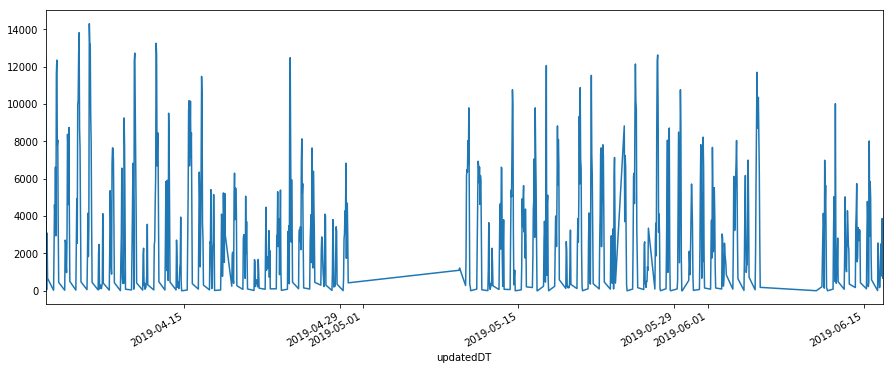

In [139]:
ts2.OutputACPower.plot()

###AR Model

In [0]:
from pandas.plotting import lag_plot

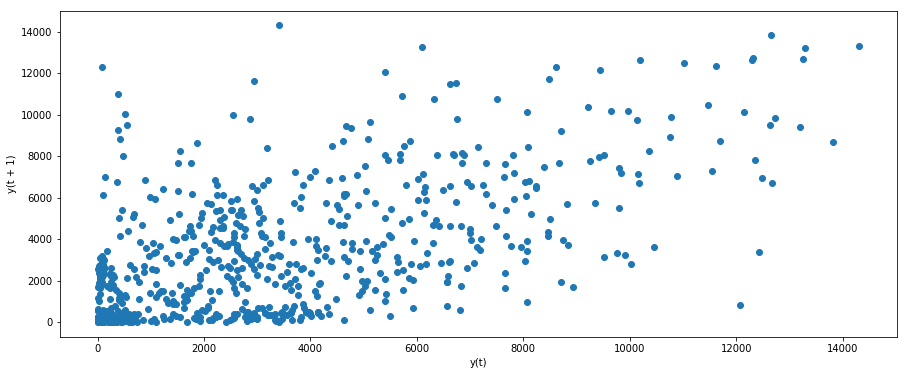

In [141]:
lag_plot(ts2)

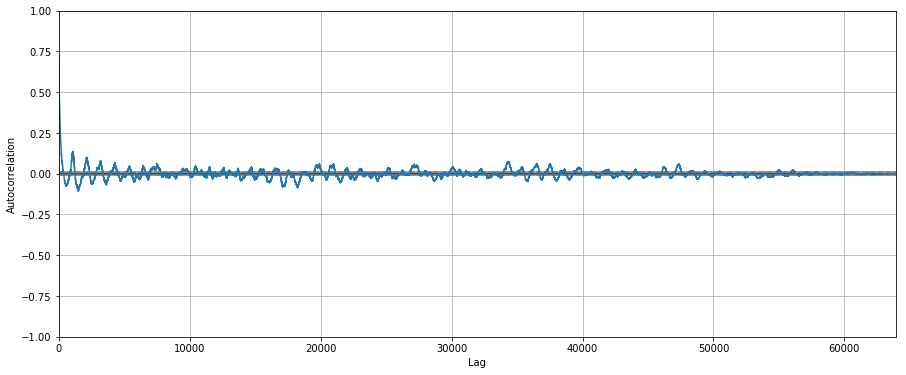

In [142]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ts)

In [145]:
len(ts2)

720

In [0]:
train_data = ts2[0:576]
test_data = ts2[576:]
#train_data = ts2[0:360]
#test_data = ts2[360:]

In [173]:
print(len(train_data))
print(len(test_data))

576
144


In [174]:
from statsmodels.tsa import ar_model
model =  ar_model.AR(train_data)
model_fitted = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [175]:
predictions = model_fitted.predict(start=len(train_data), end=len(train_data) + len(test_data)-1, dynamic=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [176]:
predictions.value_counts()

2907.594127    1
2591.501367    1
2843.324618    1
1226.947709    1
3310.268911    1
460.099114     1
4564.652615    1
3219.386565    1
3306.379429    1
3334.295996    1
4103.191919    1
2419.300393    1
5200.246455    1
3300.422799    1
2096.951465    1
3416.802501    1
3300.439564    1
3320.702882    1
3306.220631    1
3353.550061    1
3337.160084    1
3320.177685    1
3303.268261    1
3313.429881    1
3302.958811    1
3289.259097    1
3499.156001    1
3314.886440    1
3313.815342    1
3653.663332    1
              ..
3324.155505    1
3280.289522    1
3307.772320    1
3304.770202    1
3260.658910    1
3326.972700    1
3367.392301    1
3302.648277    1
3207.444055    1
3305.415942    1
3309.682003    1
3487.102625    1
3254.051588    1
3315.233901    1
3331.778715    1
3280.067116    1
3557.836658    1
3479.081227    1
3380.338168    1
3635.383159    1
3823.693998    1
3281.240641    1
3257.607754    1
3351.433452    1
3312.187578    1
3289.568481    1
3320.644926    1
3410.068011   

In [177]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data, predictions)
mse

6882493.777830154

In [178]:
from math import sqrt
rmse = sqrt(mse)
rmse

2623.450738594143

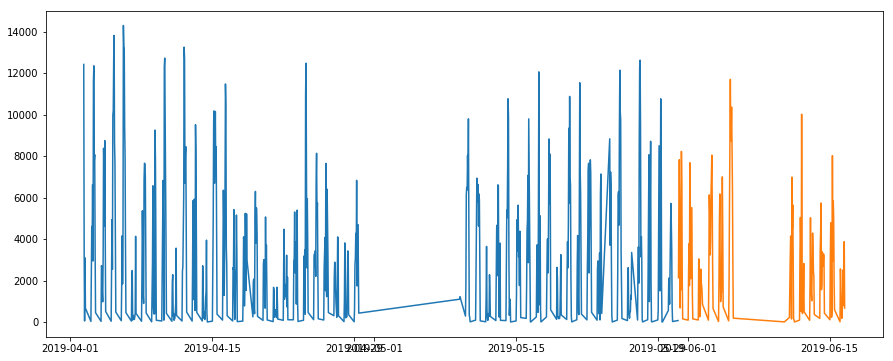

In [189]:
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
#plt.plot(predictions,label="Predictions")
plt.show()

Text(0.5, 1.0, 'Autocorrelation Function')

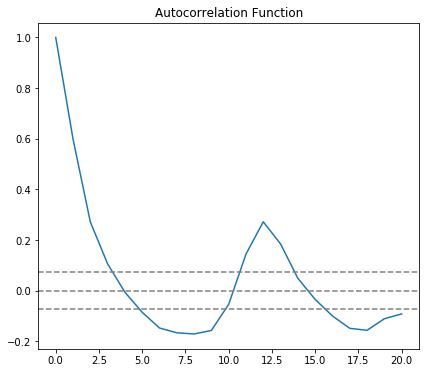

In [194]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts2.OutputACPower, nlags=20)
lag_pacf = pacf(ts2.OutputACPower, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts2.OutputACPower)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts2.OutputACPower)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

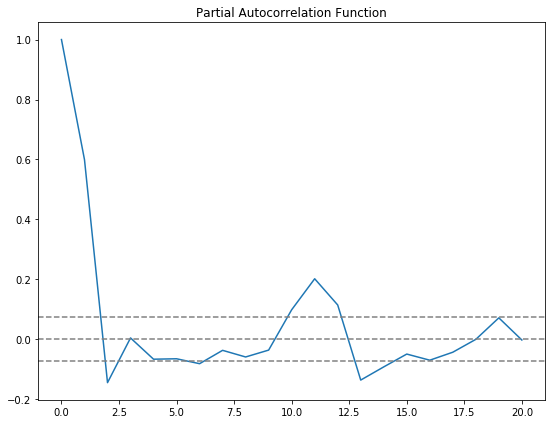

In [195]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts2.OutputACPower)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts2.OutputACPower)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


576    1480.475202
577    2488.274382
578    2955.264933
579    3174.018607
580    3276.489996
581    3324.490951
582    3346.976171
583    3357.508985
584    3362.442900
585    3364.754108
586    3365.836753
587    3366.343900
588    3366.581464
589    3366.692746
590    3366.744875
591    3366.769294
592    3366.780732
593    3366.786090
594    3366.788600
595    3366.789776
596    3366.790327
597    3366.790585
598    3366.790706
599    3366.790762
600    3366.790789
601    3366.790801
602    3366.790807
603    3366.790810
604    3366.790811
605    3366.790812
          ...     
690    3366.790812
691    3366.790812
692    3366.790812
693    3366.790812
694    3366.790812
695    3366.790812
696    3366.790812
697    3366.790812
698    3366.790812
699    3366.790812
700    3366.790812
701    3366.790812
702    3366.790812
703    3366.790812
704    3366.790812
705    3366.790812
706    3366.790812
707    3366.790812
708    3366.790812
709    3366.790812
710    3366.790812
711    3366.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


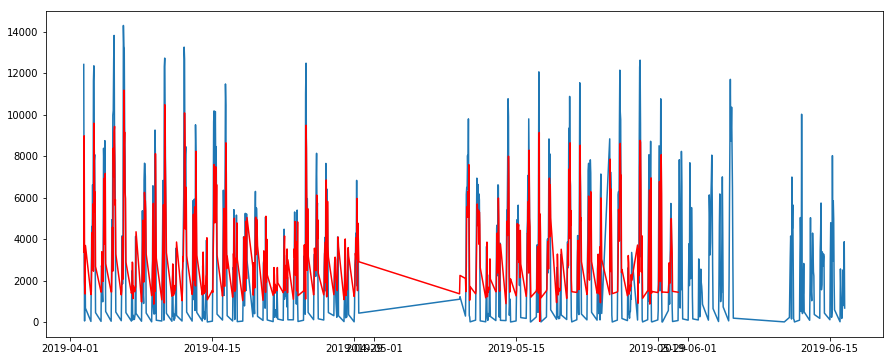

In [222]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data, order=(1, 0, 2))
model_fit = model.fit(disp=False)
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data)-1, dynamic=False)
print(predictions)
#results_ARIMA = model.fit(disp=-1)  
plt.plot(ts2)
plt.plot(model_fit.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((model_fit.fittedvalues-ts2)**2))


In [223]:
predictions.value_counts()

3366.790812    97
1480.475202     1
3366.790812     1
3366.780732     1
3366.790585     1
3366.790812     1
3366.790807     1
2955.264933     1
3366.790812     1
3366.790812     1
3365.836753     1
3362.442900     1
3366.581464     1
3366.790812     1
3366.744875     1
3366.790327     1
3366.790812     1
3366.790812     1
3366.692746     1
3366.790811     1
3366.790812     1
3366.790762     1
3366.790810     1
3366.790812     1
3324.490951     1
3366.790812     1
3366.790812     1
3366.790812     1
2488.274382     1
3366.790812     1
3357.508985     1
3366.790812     1
3366.790812     1
3366.786090     1
3366.790812     1
3366.343900     1
3276.489996     1
3366.790706     1
3366.790812     1
3366.790801     1
3366.789776     1
3364.754108     1
3366.790789     1
3346.976171     1
3174.018607     1
3366.788600     1
3366.769294     1
3366.790812     1
dtype: int64

In [0]:
# #from pmdarima.arima import auto_arima
# from pyramid.arima import auto_arima
# stepwise_model = auto_arima(data, start_p=1, start_q=1,
#                            max_p=3, max_q=3, m=12,
#                            start_P=0, seasonal=True,
#                            d=1, D=1, trace=True,
#                            error_action='ignore',  
#                            suppress_warnings=True, 
#                            stepwise=True)
# print(stepwise_model.aic())

In [224]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data, predictions)
mse

6998054.047694716

In [225]:
rmse = sqrt(mse)
rmse

2645.383535084226